<a href="https://colab.research.google.com/github/tomasplsek/AstroML/blob/main/03_sklearn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Machine learning for astronomers in Python**




# 3. hands-on session: **Random trees and forests, feature importance, grid search**

## **Contents**

1. Various classifiers
2. Finding best hyperparameters
3. Grid vs random search
4. Ensemble methods

## **Ensemble methods**

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# generate data
mean1 = [2, 0]
cov1 = [[1, 0.1], [0.1, 1]]
mean2 = [0, 2.5]
cov2 = [[1, 0.1], [0.1, 1]]
dist1 = np.random.multivariate_normal(mean1, cov1, 500)
dist2 = np.random.multivariate_normal(mean2, cov2, 500)

X_train, X_test, y_train, y_test = train_test_split(data[:, :2], data[:, -1])

# train the model
#model = RandomForestClassifier()
model = BaggingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# find accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.808

# OpenAI

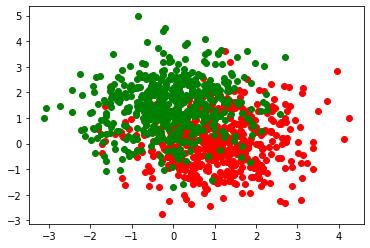

0.788
{'max_depth': 5, 'n_estimators': 30}
0.8093333333333333


In [6]:
'''
1. generate 2 dimesional data with two distinct classes.
2. classify the data using random forest classifier.
3. find best hyperparameters using grid search.
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# generate data
mean1 = [1, 0]
cov1 = [[1, 0.1], [0.1, 1]]
mean2 = [0, 1.5]
cov2 = [[1, 0.1], [0.1, 1]]
dist1 = np.random.multivariate_normal(mean1, cov1, 500)
dist2 = np.random.multivariate_normal(mean2, cov2, 500)

# plot data
plt.scatter(dist1[:, 0], dist1[:, 1], color='red')
plt.scatter(dist2[:, 0], dist2[:, 1], color='green')
plt.show()

# prepare data for classification
data = np.zeros((1000, 3))
data[:500, :2] = dist1
data[500:, :2] = dist2
data[500:, -1] = 1

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(data[:, :2], data[:, -1])

# train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# find accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# find best hyperparameters using grid search
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7]}

grid_search = GridSearchCV(RandomForestClassifier(), params, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)